<a href="https://colab.research.google.com/github/Ahmad-Nedal/Training-TH2-projs/blob/main/Elastic_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alpha:0.0001, R2:0.61, MSE:0.52, RMSE:0.72
Alpha:0.0010, R2:0.61, MSE:0.52, RMSE:0.72
Alpha:0.0100, R2:0.60, MSE:0.53, RMSE:0.73
Alpha:0.1000, R2:0.58, MSE:0.56, RMSE:0.75
Alpha:0.3000, R2:0.51, MSE:0.66, RMSE:0.81
Alpha:0.5000, R2:0.49, MSE:0.68, RMSE:0.83
Alpha:0.7000, R2:0.46, MSE:0.71, RMSE:0.84
Alpha:1.0000, R2:0.42, MSE:0.77, RMSE:0.88
R2:0.587, MSE:0.54, RMSE:0.74


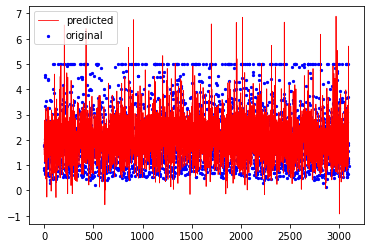

0.001
-37.11938990243067
R2:0.590, MSE:0.54, RMSE:0.73


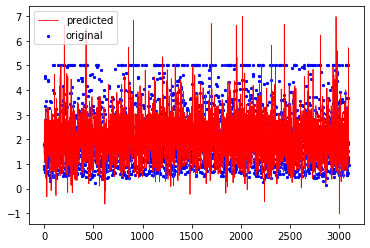

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing

boston=housing = fetch_california_housing()

#boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

elastic=ElasticNet(alpha=0.01).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


# --- ElasticNetCV ----
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()